In [1]:
import pandas as pd
import numpy as np

In [2]:
boston=pd.read_csv('housing.csv')
boston.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Checking distribution of variable 'MEDV'

C:\Users\DHANVANTRAO\AppData\Local\Temp\ipykernel_5984\1962179664.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


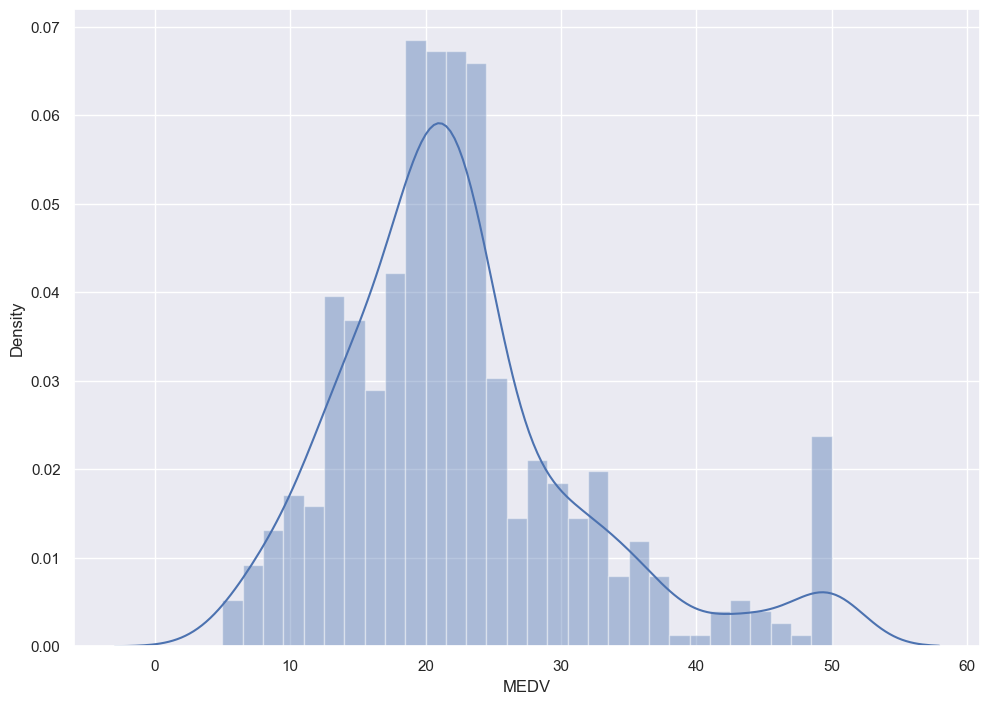

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<Axes: >

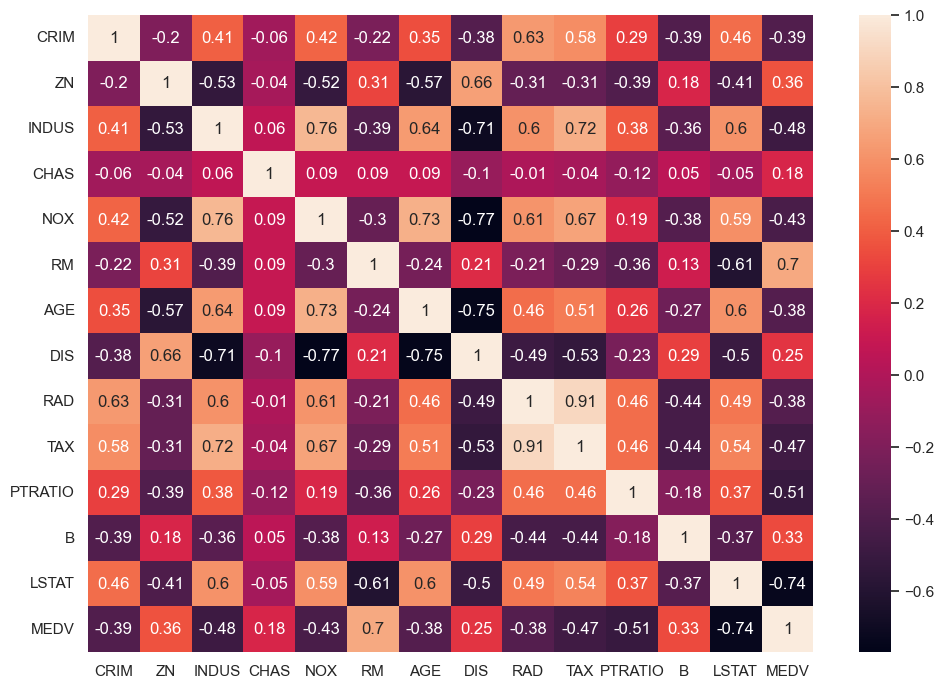

In [6]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [51]:
X = boston[[ 'CRIM','ZN','RAD', 'NOX','CHAS', 'RM','LSTAT','INDUS', 'AGE', 'DIS','TAX']]
Y = boston['MEDV']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
# Split DataSet
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35,random_state=2)

In [89]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (328, 11), Y: (328,)
Test Dataset Size - X: (178, 11), Y: (178,)


In [90]:
# Model Building
lm = LinearRegression()
lm.fit(X_train,Y_train)
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Regression Line Tracing')

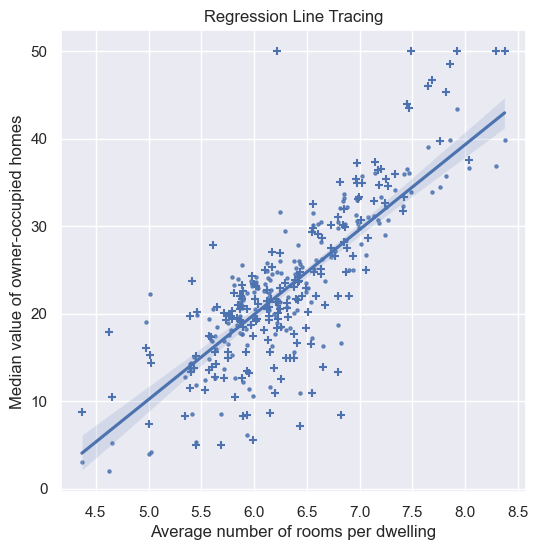

In [91]:
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test['RM'], y = predictions, scatter_kws={'s':5})
plt.scatter(X_test['RM'], Y_test, marker = '+')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes')
plt.title('Regression Line Tracing')

In [92]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R2 Score:',  r2_score(Y_test, predictions))

Mean Absolute Error: 3.5620713631457233
Mean Square Error: 24.037563973023154
Root Mean Square Error: 4.902811843526442
R2 Score: 0.7466727798699356
